In [1]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt   
%matplotlib inline

In [239]:
df=pd.read_csv(r"C:\Users\mohad\Downloads\1632560262896716.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### removing Gender feature because k_means algorithm is not directly applicable on categorical features.

In [240]:
from sklearn import preprocessing
df=df.drop('Gender',1)
df.head()

C:\Users\mohad\AppData\Local\Temp\ipykernel_11484\2924405063.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('Gender',1)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


### scaling data on normal distribution chart

In [90]:
from sklearn.preprocessing import StandardScaler
x = df.values[:,1:]
x = np.nan_to_num(x)
df = StandardScaler().fit_transform(x)
df

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

### Evaluating the optimal k

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

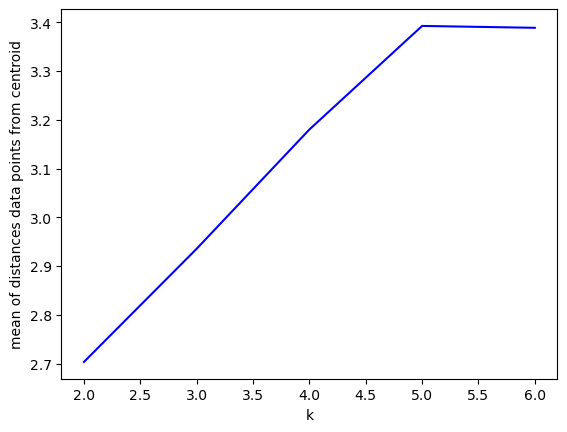

In [94]:
from sklearn.cluster import KMeans
clusterNum = [2,3,4,5,6]
sse = []
meanSSE=[]
for k in clusterNum:
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    k_means.fit(df)
    centroids = k_means.cluster_centers_
    for i in range (len(df)):
        sse.append((df[i, 0] - centroids[0]) ** 2 + (df[i, 2] - centroids[1]) ** 2)
    meanSSE.append(np.mean(sse))
plt.plot(clusterNum,meanSSE,color='blue')
plt.xlabel('k')
plt.ylabel('mean of distances data points from centroid')
plt.show()

### As shown above the plot looks like an arm with a clear elbow at k = 3.

### creating k_means model

In [95]:
df=pd.DataFrame(df,columns=['Age','Annual Income','Spending Score'])
df.head()

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [96]:
k=5
k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means.fit(df)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, n_init=12)

In [97]:
labels=k_means.labels_
print(labels)
df['cluster'] = labels
df['cluster'].value_counts()
df.head()

[2 2 4 2 2 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 0 2 4 2 4 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 0 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 3 2 2 2 0 0 0 0 2 3 1 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


,Age,Annual Income,Spending Score,cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


In [98]:
df=df.dropna()

### visualization


C:\Users\mohad\AppData\Local\Temp\ipykernel_11484\80072454.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df.iloc[:,0], df.iloc[:,1], s=area*3, c=labels.astype(np.float), alpha=0.9)


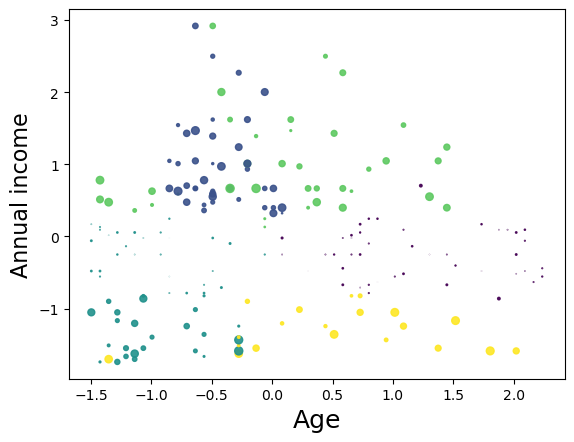

In [127]:
area = np.pi * ( df.iloc[:,2])**2  
plt.scatter(df.iloc[:,0], df.iloc[:,1], s=area*3, c=labels.astype(np.float), alpha=0.9)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Annual income', fontsize=16)
plt.show()


C:\Users\mohad\AppData\Local\Temp\ipykernel_11484\188753386.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df.iloc[:,0], df.iloc[:,2], s=area*3, c=labels.astype(np.float), alpha=0.9)


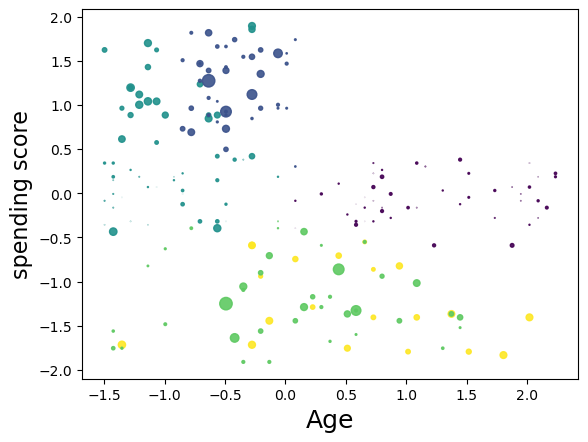

In [128]:
area = np.pi * ( df.iloc[:,1])**2  
plt.scatter(df.iloc[:,0], df.iloc[:,2], s=area*3, c=labels.astype(np.float), alpha=0.9)
plt.xlabel('Age', fontsize=18)
plt.ylabel('spending score', fontsize=16)
plt.show()


#### it seems that purple cluster differ from dark green cluster in terms of height(z axis). so we'll plot it in a 3D area. also in this case, our dataset is clustered almost with no overlap and the amount of noises has been significantly reduced.

C:\Users\mohad\AppData\Local\Temp\ipykernel_11484\2760349713.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df.iloc[:,1], df.iloc[:,2], s=area*3, c=labels.astype(np.float), alpha=0.9)


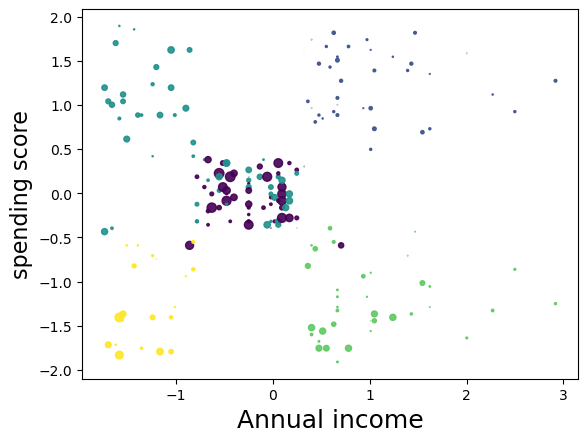

In [102]:
area = np.pi * ( df.iloc[:,0])**2  
plt.scatter(df.iloc[:,1], df.iloc[:,2], s=area*3, c=labels.astype(np.float), alpha=0.9)
plt.xlabel('Annual income', fontsize=18)
plt.ylabel('spending score', fontsize=16)
plt.show()


C:\Users\mohad\AppData\Local\Temp\ipykernel_11484\3871161201.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plot_geeks = ax.scatter(df.iloc[:, 1], df.iloc[:, 0], df.iloc[:, 2], c= labels.astype(np.float))


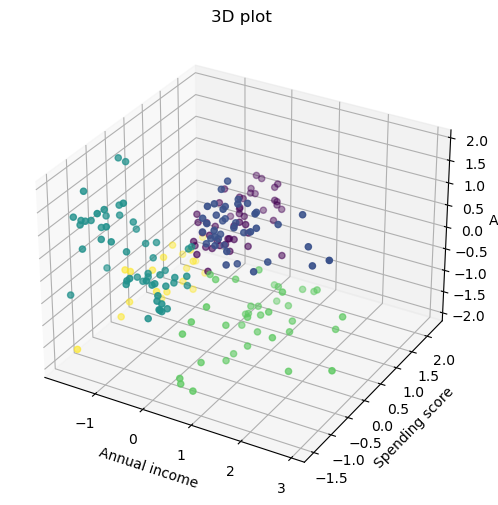

In [123]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
plot_geeks = ax.scatter(df.iloc[:, 1], df.iloc[:, 0], df.iloc[:, 2], c= labels.astype(np.float))
#plt.cla()
ax.set_title("3D plot")
ax.set_xlabel('Annual income')
ax.set_ylabel('Spending score')
ax.set_zlabel('Age')
plt.show()

## hierarchy

### calculating distance matrix

In [195]:
df=pd.read_csv(r"C:\Users\mohad\Downloads\1632560262896716.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [196]:
from sklearn import preprocessing
df=df.drop('Gender',1)
df.head()

C:\Users\mohad\AppData\Local\Temp\ipykernel_11484\2924405063.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('Gender',1)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [197]:
from sklearn.preprocessing import StandardScaler
x = df.values[:,1:]
x = np.nan_to_num(x)
dfScaled = StandardScaler().fit_transform(x)
dfScaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [198]:
from sklearn.metrics.pairwise import euclidean_distances
distance_matrix = euclidean_distances(dfScaled,dfScaled) 
print(distance_matrix)

[[0.         1.63681098 1.28368768 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         2.91275149 ... 4.3182849  5.31878915 4.70189264]
 [1.28368768 2.91275149 0.         ... 5.03379713 4.72114828 5.54808733]
 ...
 [4.54611614 4.3182849  5.03379713 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 4.72114828 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 5.54808733 ... 0.5647686  2.5274803  0.        ]]


### creating agglomerative model

In [199]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(distance_matrix)

agglom.labels_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([4, 4, 4, 4, 1, 4, 1, 4, 2, 4, 2, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       2, 4, 2, 4, 1, 0, 1, 4, 2, 4, 2, 4, 1, 4, 1, 0, 1, 4, 1, 4, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [200]:
df['cluster'] = agglom.labels_
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,4
1,2,21,15,81,4
2,3,20,16,6,4
3,4,23,16,77,4
4,5,31,17,40,1


In [201]:
df.rename(columns = {'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'}, inplace = True)
df.head()

,CustomerID,Age,AnnualIncome,SpendingScore,cluster
0,1,19,15,39,4
1,2,21,15,81,4
2,3,20,16,6,4
3,4,23,16,77,4
4,5,31,17,40,1


### visualization

C:\Users\mohad\AppData\Local\Temp\ipykernel_11484\4224341579.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.AnnualIncome, subset.SpendingScore, s= subset.Age*5, c=color, label='cluster'+str(label),alpha=0.6)


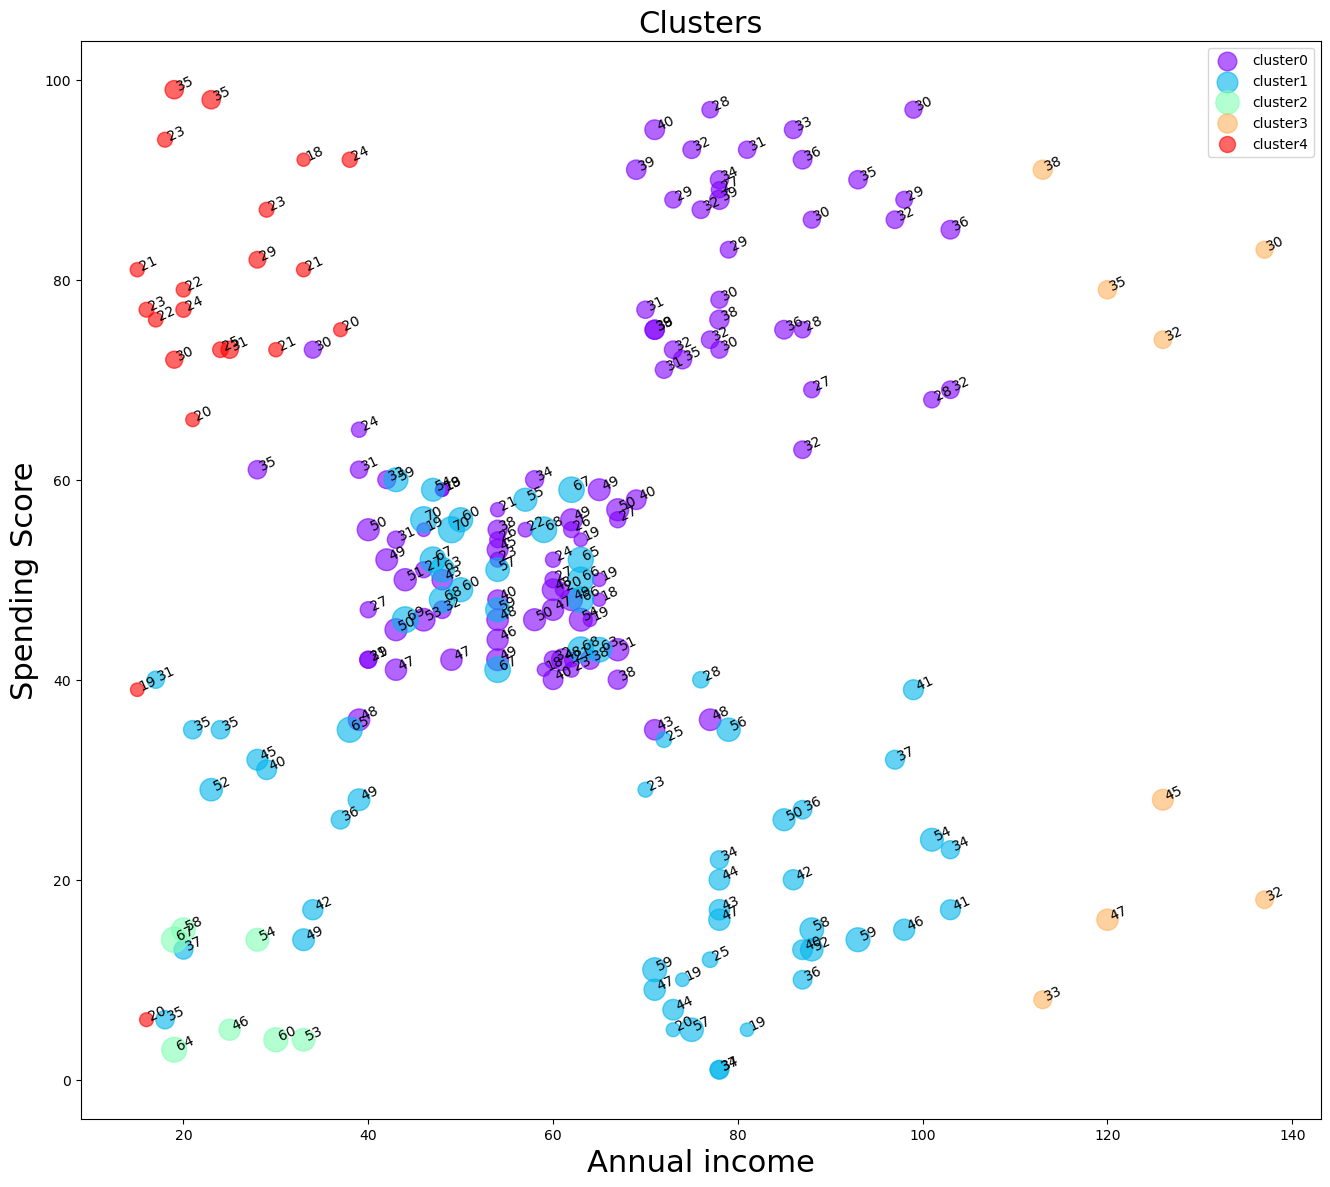

In [217]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster == label]
    for i in subset.index:
            plt.text(subset.AnnualIncome[i], subset.SpendingScore[i],str(subset['Age'][i]), rotation=25) 
    plt.scatter(subset.AnnualIncome, subset.SpendingScore, s= subset.Age*5, c=color, label='cluster'+str(label),alpha=0.6)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters',fontsize=22)
plt.xlabel('Annual income',fontsize=22)
plt.ylabel('Spending Score',fontsize=22)
plt.show()

### it has more noise than the previous clustering.

C:\Users\mohad\AppData\Local\Temp\ipykernel_11484\2067886247.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Age, subset.AnnualIncome, s= subset.SpendingScore*5, c=color, label='cluster'+str(label),alpha=0.6)


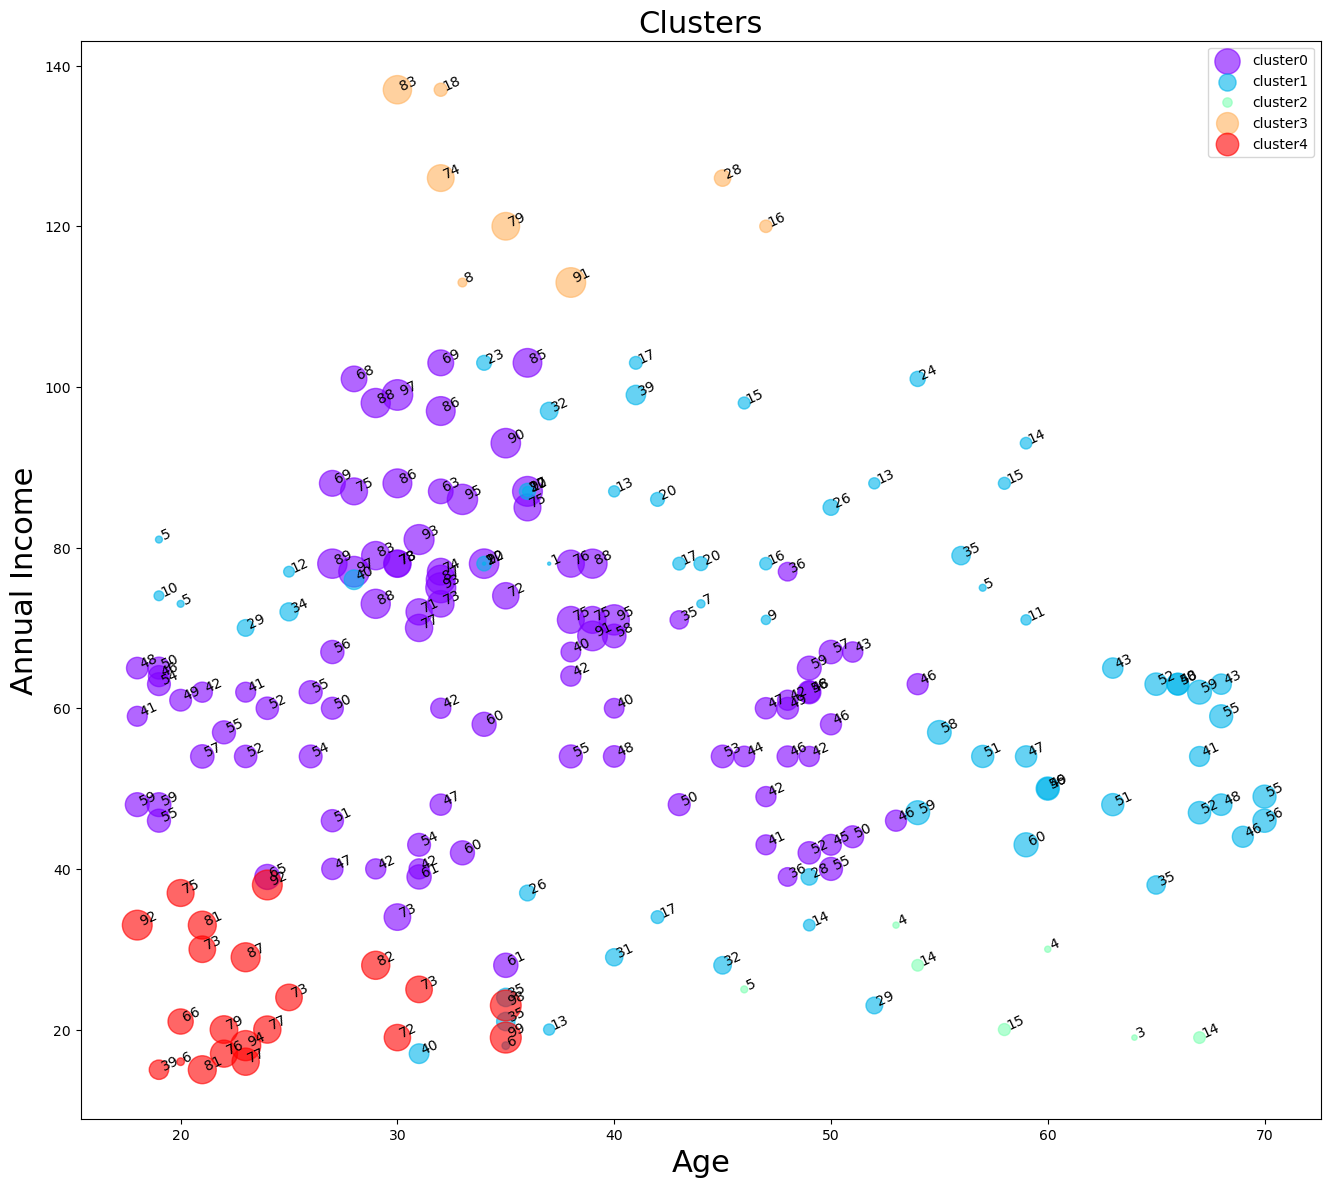

In [218]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster == label]
    for i in subset.index:
            plt.text(subset.Age[i], subset.AnnualIncome[i],str(subset['SpendingScore'][i]), rotation=25) 
    plt.scatter(subset.Age, subset.AnnualIncome, s= subset.SpendingScore*5, c=color, label='cluster'+str(label),alpha=0.6)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters',fontsize=22)
plt.xlabel('Age',fontsize=22)
plt.ylabel('Annual Income',fontsize=22)
plt.show()

### it has a lot of noise and is not clustered very accurately.
### the first clustering which we considered the relation between annual income and spending score is more accurate and logical. 

C:\Users\mohad\AppData\Local\Temp\ipykernel_11484\2317958382.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Age, subset.SpendingScore, s= subset.AnnualIncome*5, c=color, label='cluster'+str(label),alpha=0.6)


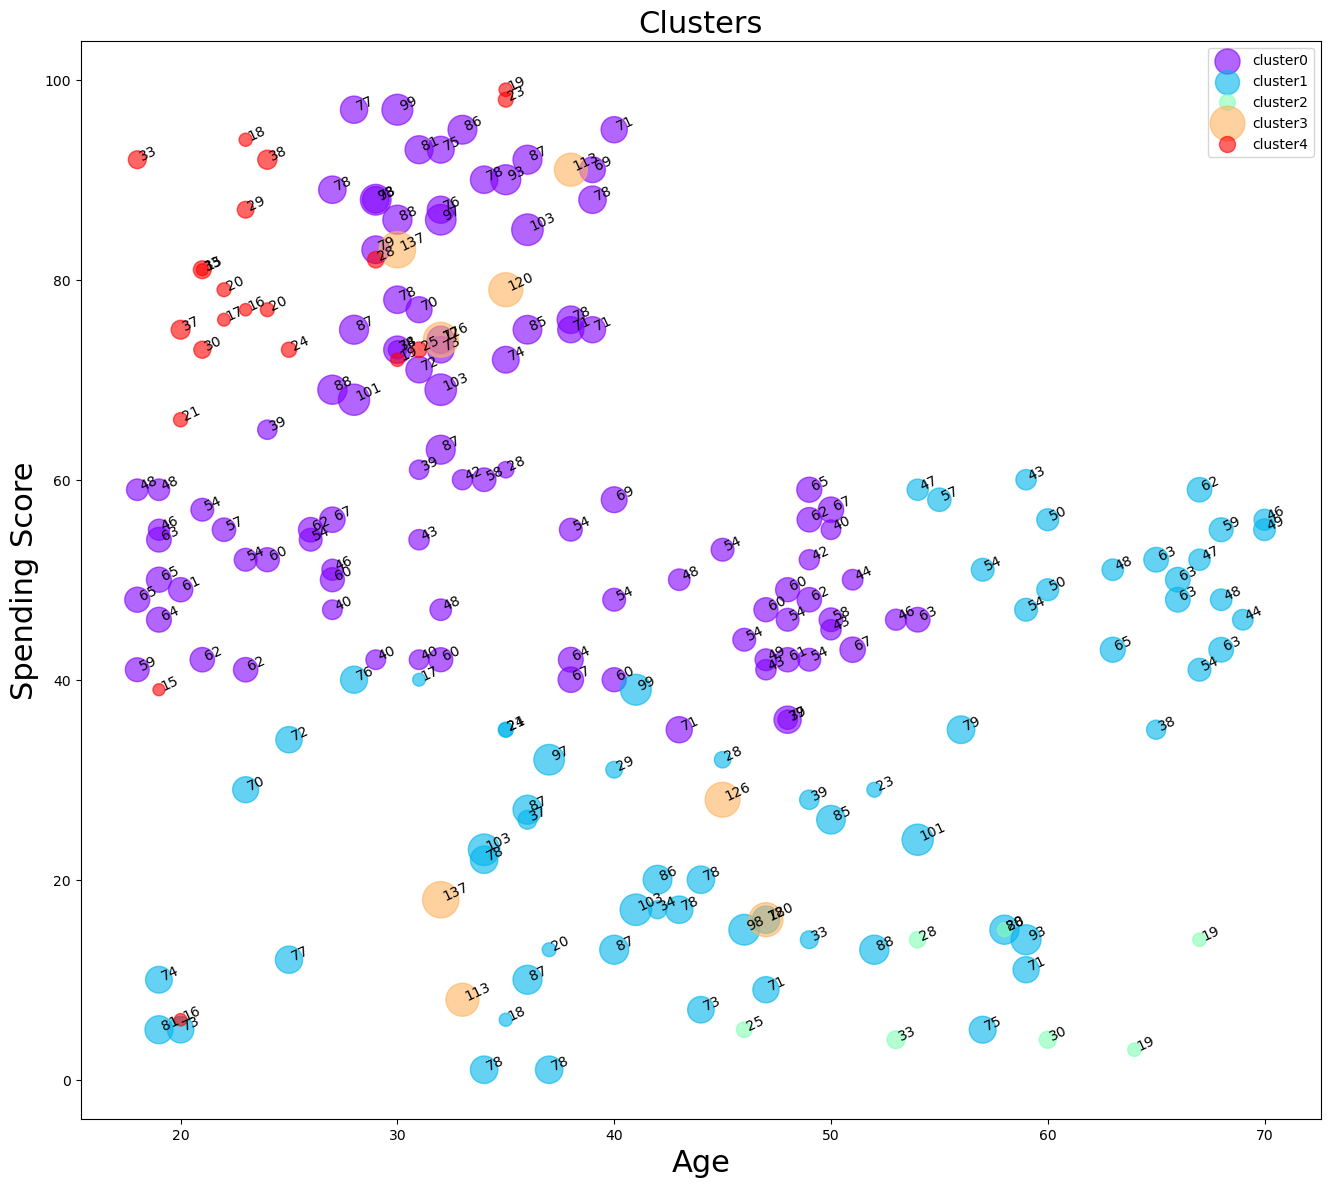

In [219]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster == label]
    for i in subset.index:
            plt.text(subset.Age[i], subset.SpendingScore[i],str(subset['AnnualIncome'][i]), rotation=25) 
    plt.scatter(subset.Age, subset.SpendingScore, s= subset.AnnualIncome*5, c=color, label='cluster'+str(label),alpha=0.6)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters',fontsize=22)
plt.xlabel('Age',fontsize=22)
plt.ylabel('Spending Score',fontsize=22)
plt.show()

In [242]:
df.dropna()
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [249]:
from sklearn.preprocessing import StandardScaler
x = df.values[:,1:]
x = np.nan_to_num(x)
dfScaled = StandardScaler().fit_transform(x)
dfScaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

## DBSCAN

### creating DBSCAN model

In [290]:
from sklearn.cluster import DBSCAN 
epsilon = 0.4
minimumSamples = 7
dbscan = DBSCAN(eps=epsilon, min_samples=minimumSamples)
dbscan.fit(dfScaled)
labels = dbscan.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0,  1, -1,  0,  1,  0, -1,  0,  1,  2,  0,
        1, -1,  0,  2, -1, -1, -1,  1,  2, -1,  1,  2, -1, -1,  0,  2,  1,
        2, -1,  1, -1,  2,  3,  1,  2, -1, -1,  1,  2,  1,  2,  1,  1,  2,
        3,  1,  2,  1,  3,  2,  3,  3,  3,  1, -1,  1,  1,  1,  3, -1,  2,
       -1,  1, -1, -1, -1, -1,  4, -1, -1, -1,  4, -1,  4, -1,  4, -1,  4,
       -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,
        4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1, -1, -1,  4, -1, -1,
       -1,  4, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

### number of clusters without noise

In [291]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

5

### getting labels

In [292]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4}

### detecting core data points

In [293]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False,  True,
       False, False,  True, False, False,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True,  True, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,

### visualization

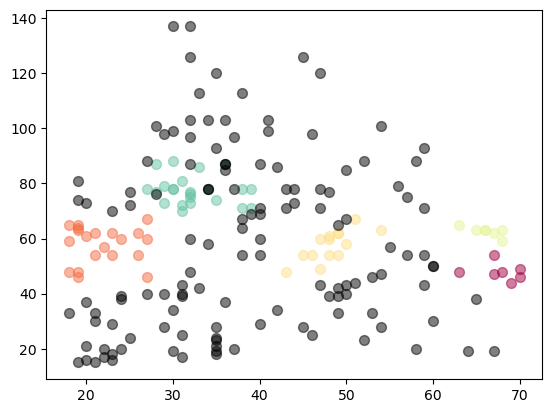

In [294]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = df[class_member_mask & core_samples_mask]
    #print(xy)
    #print('\n')
    plt.scatter(xy.iloc[:, 1], xy.iloc[:, 2],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = df[class_member_mask & ~core_samples_mask]
    plt.scatter(xy.iloc[:, 1], xy.iloc[:, 2],s=50, c=[col], marker=u'o', alpha=0.5)